In [1]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
!pip install torch_summary
from torchsummary import summary
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
model = models.vgg16(pretrained=True).to(device)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/pedro/.cache/torch/hub/checkpoints/vgg16-397923af.pth
4.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

17.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

29.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_r

In [3]:
summary(model, torch.zeros(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─ReLU: 2-12                        [-1, 256, 56, 56]      

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─ReLU: 2-12                        [-1, 256, 56, 56]      

In [4]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
from torch import optim
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
from glob import glob
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

In [7]:
!pip install -q kaggle

In [9]:
!chmod 600 /home/pedro/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d tongpython/cat-and-dog

 98%|███████████████████████████████████████ | 213M/218M [00:09<00:00, 35.7MB/s]
100%|████████████████████████████████████████| 218M/218M [00:09<00:00, 23.4MB/s]


In [11]:
!unzip cat-and-dog.zip

Archive:  cat-and-dog.zip
  inflating: test_set/test_set/cats/_DS_Store  
  inflating: test_set/test_set/cats/cat.4001.jpg  
  inflating: test_set/test_set/cats/cat.4002.jpg  
  inflating: test_set/test_set/cats/cat.4003.jpg  
  inflating: test_set/test_set/cats/cat.4004.jpg  
  inflating: test_set/test_set/cats/cat.4005.jpg  
  inflating: test_set/test_set/cats/cat.4006.jpg  
  inflating: test_set/test_set/cats/cat.4007.jpg  
  inflating: test_set/test_set/cats/cat.4008.jpg  
  inflating: test_set/test_set/cats/cat.4009.jpg  
  inflating: test_set/test_set/cats/cat.4010.jpg  
  inflating: test_set/test_set/cats/cat.4011.jpg  
  inflating: test_set/test_set/cats/cat.4012.jpg  
  inflating: test_set/test_set/cats/cat.4013.jpg  
  inflating: test_set/test_set/cats/cat.4014.jpg  
  inflating: test_set/test_set/cats/cat.4015.jpg  
  inflating: test_set/test_set/cats/cat.4016.jpg  
  inflating: test_set/test_set/cats/cat.4017.jpg  
  inflating: test_set/test_set/cats/cat.4018.jpg  
  inflat

  inflating: test_set/test_set/cats/cat.4257.jpg  
  inflating: test_set/test_set/cats/cat.4258.jpg  
  inflating: test_set/test_set/cats/cat.4259.jpg  
  inflating: test_set/test_set/cats/cat.4260.jpg  
  inflating: test_set/test_set/cats/cat.4261.jpg  
  inflating: test_set/test_set/cats/cat.4262.jpg  
  inflating: test_set/test_set/cats/cat.4263.jpg  
  inflating: test_set/test_set/cats/cat.4264.jpg  
  inflating: test_set/test_set/cats/cat.4265.jpg  
  inflating: test_set/test_set/cats/cat.4266.jpg  
  inflating: test_set/test_set/cats/cat.4267.jpg  
  inflating: test_set/test_set/cats/cat.4268.jpg  
  inflating: test_set/test_set/cats/cat.4269.jpg  
  inflating: test_set/test_set/cats/cat.4270.jpg  
  inflating: test_set/test_set/cats/cat.4271.jpg  
  inflating: test_set/test_set/cats/cat.4272.jpg  
  inflating: test_set/test_set/cats/cat.4273.jpg  
  inflating: test_set/test_set/cats/cat.4274.jpg  
  inflating: test_set/test_set/cats/cat.4275.jpg  
  inflating: test_set/test_set/

  inflating: test_set/test_set/cats/cat.4640.jpg  
  inflating: test_set/test_set/cats/cat.4641.jpg  
  inflating: test_set/test_set/cats/cat.4642.jpg  
  inflating: test_set/test_set/cats/cat.4643.jpg  
  inflating: test_set/test_set/cats/cat.4644.jpg  
  inflating: test_set/test_set/cats/cat.4645.jpg  
  inflating: test_set/test_set/cats/cat.4646.jpg  
  inflating: test_set/test_set/cats/cat.4647.jpg  
  inflating: test_set/test_set/cats/cat.4648.jpg  
  inflating: test_set/test_set/cats/cat.4649.jpg  
  inflating: test_set/test_set/cats/cat.4650.jpg  
  inflating: test_set/test_set/cats/cat.4651.jpg  
  inflating: test_set/test_set/cats/cat.4652.jpg  
  inflating: test_set/test_set/cats/cat.4653.jpg  
  inflating: test_set/test_set/cats/cat.4654.jpg  
  inflating: test_set/test_set/cats/cat.4655.jpg  
  inflating: test_set/test_set/cats/cat.4656.jpg  
  inflating: test_set/test_set/cats/cat.4657.jpg  
  inflating: test_set/test_set/cats/cat.4658.jpg  
  inflating: test_set/test_set/

  inflating: test_set/test_set/dogs/dog.4025.jpg  
  inflating: test_set/test_set/dogs/dog.4026.jpg  
  inflating: test_set/test_set/dogs/dog.4027.jpg  
  inflating: test_set/test_set/dogs/dog.4028.jpg  
  inflating: test_set/test_set/dogs/dog.4029.jpg  
  inflating: test_set/test_set/dogs/dog.4030.jpg  
  inflating: test_set/test_set/dogs/dog.4031.jpg  
  inflating: test_set/test_set/dogs/dog.4032.jpg  
  inflating: test_set/test_set/dogs/dog.4033.jpg  
  inflating: test_set/test_set/dogs/dog.4034.jpg  
  inflating: test_set/test_set/dogs/dog.4035.jpg  
  inflating: test_set/test_set/dogs/dog.4036.jpg  
  inflating: test_set/test_set/dogs/dog.4037.jpg  
  inflating: test_set/test_set/dogs/dog.4038.jpg  
  inflating: test_set/test_set/dogs/dog.4039.jpg  
  inflating: test_set/test_set/dogs/dog.4040.jpg  
  inflating: test_set/test_set/dogs/dog.4041.jpg  
  inflating: test_set/test_set/dogs/dog.4042.jpg  
  inflating: test_set/test_set/dogs/dog.4043.jpg  
  inflating: test_set/test_set/

  inflating: test_set/test_set/dogs/dog.4368.jpg  
  inflating: test_set/test_set/dogs/dog.4369.jpg  
  inflating: test_set/test_set/dogs/dog.4370.jpg  
  inflating: test_set/test_set/dogs/dog.4371.jpg  
  inflating: test_set/test_set/dogs/dog.4372.jpg  
  inflating: test_set/test_set/dogs/dog.4373(1).jpg  
  inflating: test_set/test_set/dogs/dog.4373.jpg  
  inflating: test_set/test_set/dogs/dog.4374.jpg  
  inflating: test_set/test_set/dogs/dog.4375.jpg  
  inflating: test_set/test_set/dogs/dog.4376.jpg  
  inflating: test_set/test_set/dogs/dog.4377.jpg  
  inflating: test_set/test_set/dogs/dog.4378.jpg  
  inflating: test_set/test_set/dogs/dog.4379.jpg  
  inflating: test_set/test_set/dogs/dog.4380.jpg  
  inflating: test_set/test_set/dogs/dog.4381.jpg  
  inflating: test_set/test_set/dogs/dog.4382.jpg  
  inflating: test_set/test_set/dogs/dog.4383.jpg  
  inflating: test_set/test_set/dogs/dog.4384.jpg  
  inflating: test_set/test_set/dogs/dog.4385.jpg  
  inflating: test_set/test_s

  inflating: test_set/test_set/dogs/dog.4707.jpg  
  inflating: test_set/test_set/dogs/dog.4708.jpg  
  inflating: test_set/test_set/dogs/dog.4709.jpg  
  inflating: test_set/test_set/dogs/dog.4710.jpg  
  inflating: test_set/test_set/dogs/dog.4711.jpg  
  inflating: test_set/test_set/dogs/dog.4712.jpg  
  inflating: test_set/test_set/dogs/dog.4713.jpg  
  inflating: test_set/test_set/dogs/dog.4714.jpg  
  inflating: test_set/test_set/dogs/dog.4715.jpg  
  inflating: test_set/test_set/dogs/dog.4716.jpg  
  inflating: test_set/test_set/dogs/dog.4717.jpg  
  inflating: test_set/test_set/dogs/dog.4718.jpg  
  inflating: test_set/test_set/dogs/dog.4719.jpg  
  inflating: test_set/test_set/dogs/dog.4720.jpg  
  inflating: test_set/test_set/dogs/dog.4721.jpg  
  inflating: test_set/test_set/dogs/dog.4722.jpg  
  inflating: test_set/test_set/dogs/dog.4723.jpg  
  inflating: test_set/test_set/dogs/dog.4724.jpg  
  inflating: test_set/test_set/dogs/dog.4725.jpg  
  inflating: test_set/test_set/

  inflating: training_set/training_set/cats/cat.1045.jpg  
  inflating: training_set/training_set/cats/cat.1046.jpg  
  inflating: training_set/training_set/cats/cat.1047.jpg  
  inflating: training_set/training_set/cats/cat.1048.jpg  
  inflating: training_set/training_set/cats/cat.1049.jpg  
  inflating: training_set/training_set/cats/cat.105.jpg  
  inflating: training_set/training_set/cats/cat.1050.jpg  
  inflating: training_set/training_set/cats/cat.1051.jpg  
  inflating: training_set/training_set/cats/cat.1052.jpg  
  inflating: training_set/training_set/cats/cat.1053.jpg  
  inflating: training_set/training_set/cats/cat.1054.jpg  
  inflating: training_set/training_set/cats/cat.1055.jpg  
  inflating: training_set/training_set/cats/cat.1056.jpg  
  inflating: training_set/training_set/cats/cat.1057.jpg  
  inflating: training_set/training_set/cats/cat.1058.jpg  
  inflating: training_set/training_set/cats/cat.1059.jpg  
  inflating: training_set/training_set/cats/cat.106.jpg  

  inflating: training_set/training_set/cats/cat.1392.jpg  
  inflating: training_set/training_set/cats/cat.1393.jpg  
  inflating: training_set/training_set/cats/cat.1394.jpg  
  inflating: training_set/training_set/cats/cat.1395.jpg  
  inflating: training_set/training_set/cats/cat.1396.jpg  
  inflating: training_set/training_set/cats/cat.1397.jpg  
  inflating: training_set/training_set/cats/cat.1398.jpg  
  inflating: training_set/training_set/cats/cat.1399.jpg  
  inflating: training_set/training_set/cats/cat.14.jpg  
  inflating: training_set/training_set/cats/cat.140.jpg  
  inflating: training_set/training_set/cats/cat.1400.jpg  
  inflating: training_set/training_set/cats/cat.1401.jpg  
  inflating: training_set/training_set/cats/cat.1402.jpg  
  inflating: training_set/training_set/cats/cat.1403.jpg  
  inflating: training_set/training_set/cats/cat.1404.jpg  
  inflating: training_set/training_set/cats/cat.1405.jpg  
  inflating: training_set/training_set/cats/cat.1406.jpg  


  inflating: training_set/training_set/cats/cat.1759.jpg  
  inflating: training_set/training_set/cats/cat.176.jpg  
  inflating: training_set/training_set/cats/cat.1760.jpg  
  inflating: training_set/training_set/cats/cat.1761.jpg  
  inflating: training_set/training_set/cats/cat.1762.jpg  
  inflating: training_set/training_set/cats/cat.1763.jpg  
  inflating: training_set/training_set/cats/cat.1764.jpg  
  inflating: training_set/training_set/cats/cat.1765.jpg  
  inflating: training_set/training_set/cats/cat.1766.jpg  
  inflating: training_set/training_set/cats/cat.1767.jpg  
  inflating: training_set/training_set/cats/cat.1768.jpg  
  inflating: training_set/training_set/cats/cat.1769.jpg  
  inflating: training_set/training_set/cats/cat.177.jpg  
  inflating: training_set/training_set/cats/cat.1770.jpg  
  inflating: training_set/training_set/cats/cat.1771.jpg  
  inflating: training_set/training_set/cats/cat.1772.jpg  
  inflating: training_set/training_set/cats/cat.1773.jpg  

  inflating: training_set/training_set/cats/cat.2111.jpg  
  inflating: training_set/training_set/cats/cat.2112.jpg  
  inflating: training_set/training_set/cats/cat.2113.jpg  
  inflating: training_set/training_set/cats/cat.2114.jpg  
  inflating: training_set/training_set/cats/cat.2115.jpg  
  inflating: training_set/training_set/cats/cat.2116.jpg  
  inflating: training_set/training_set/cats/cat.2117.jpg  
  inflating: training_set/training_set/cats/cat.2118.jpg  
  inflating: training_set/training_set/cats/cat.2119.jpg  
  inflating: training_set/training_set/cats/cat.212.jpg  
  inflating: training_set/training_set/cats/cat.2120.jpg  
  inflating: training_set/training_set/cats/cat.2121.jpg  
  inflating: training_set/training_set/cats/cat.2122.jpg  
  inflating: training_set/training_set/cats/cat.2123.jpg  
  inflating: training_set/training_set/cats/cat.2124.jpg  
  inflating: training_set/training_set/cats/cat.2125.jpg  
  inflating: training_set/training_set/cats/cat.2126.jpg 

  inflating: training_set/training_set/cats/cat.2465.jpg  
  inflating: training_set/training_set/cats/cat.2466.jpg  
  inflating: training_set/training_set/cats/cat.2467.jpg  
  inflating: training_set/training_set/cats/cat.2468.jpg  
  inflating: training_set/training_set/cats/cat.2469.jpg  
  inflating: training_set/training_set/cats/cat.247.jpg  
  inflating: training_set/training_set/cats/cat.2470.jpg  
  inflating: training_set/training_set/cats/cat.2471.jpg  
  inflating: training_set/training_set/cats/cat.2472.jpg  
  inflating: training_set/training_set/cats/cat.2473.jpg  
  inflating: training_set/training_set/cats/cat.2474.jpg  
  inflating: training_set/training_set/cats/cat.2475.jpg  
  inflating: training_set/training_set/cats/cat.2476.jpg  
  inflating: training_set/training_set/cats/cat.2477.jpg  
  inflating: training_set/training_set/cats/cat.2478.jpg  
  inflating: training_set/training_set/cats/cat.2479.jpg  
  inflating: training_set/training_set/cats/cat.248.jpg  

  inflating: training_set/training_set/cats/cat.2819.jpg  
  inflating: training_set/training_set/cats/cat.282.jpg  
  inflating: training_set/training_set/cats/cat.2820.jpg  
  inflating: training_set/training_set/cats/cat.2821.jpg  
  inflating: training_set/training_set/cats/cat.2822.jpg  
  inflating: training_set/training_set/cats/cat.2823.jpg  
  inflating: training_set/training_set/cats/cat.2824.jpg  
  inflating: training_set/training_set/cats/cat.2825.jpg  
  inflating: training_set/training_set/cats/cat.2826.jpg  
  inflating: training_set/training_set/cats/cat.2827.jpg  
  inflating: training_set/training_set/cats/cat.2828.jpg  
  inflating: training_set/training_set/cats/cat.2829.jpg  
  inflating: training_set/training_set/cats/cat.283.jpg  
  inflating: training_set/training_set/cats/cat.2830.jpg  
  inflating: training_set/training_set/cats/cat.2831.jpg  
  inflating: training_set/training_set/cats/cat.2832.jpg  
  inflating: training_set/training_set/cats/cat.2833.jpg  

  inflating: training_set/training_set/cats/cat.3161.jpg  
  inflating: training_set/training_set/cats/cat.3162.jpg  
  inflating: training_set/training_set/cats/cat.3163.jpg  
  inflating: training_set/training_set/cats/cat.3164.jpg  
  inflating: training_set/training_set/cats/cat.3165.jpg  
  inflating: training_set/training_set/cats/cat.3166.jpg  
  inflating: training_set/training_set/cats/cat.3167.jpg  
  inflating: training_set/training_set/cats/cat.3168.jpg  
  inflating: training_set/training_set/cats/cat.3169.jpg  
  inflating: training_set/training_set/cats/cat.317.jpg  
  inflating: training_set/training_set/cats/cat.3170.jpg  
  inflating: training_set/training_set/cats/cat.3171.jpg  
  inflating: training_set/training_set/cats/cat.3172.jpg  
  inflating: training_set/training_set/cats/cat.3173.jpg  
  inflating: training_set/training_set/cats/cat.3174.jpg  
  inflating: training_set/training_set/cats/cat.3175.jpg  
  inflating: training_set/training_set/cats/cat.3176.jpg 

  inflating: training_set/training_set/cats/cat.3517.jpg  
  inflating: training_set/training_set/cats/cat.3518.jpg  
  inflating: training_set/training_set/cats/cat.3519.jpg  
  inflating: training_set/training_set/cats/cat.352.jpg  
  inflating: training_set/training_set/cats/cat.3520.jpg  
  inflating: training_set/training_set/cats/cat.3521.jpg  
  inflating: training_set/training_set/cats/cat.3522.jpg  
  inflating: training_set/training_set/cats/cat.3523.jpg  
  inflating: training_set/training_set/cats/cat.3524.jpg  
  inflating: training_set/training_set/cats/cat.3525.jpg  
  inflating: training_set/training_set/cats/cat.3526.jpg  
  inflating: training_set/training_set/cats/cat.3527.jpg  
  inflating: training_set/training_set/cats/cat.3528.jpg  
  inflating: training_set/training_set/cats/cat.3529.jpg  
  inflating: training_set/training_set/cats/cat.353.jpg  
  inflating: training_set/training_set/cats/cat.3530.jpg  
  inflating: training_set/training_set/cats/cat.3531.jpg  

  inflating: training_set/training_set/cats/cat.3874.jpg  
  inflating: training_set/training_set/cats/cat.3875.jpg  
  inflating: training_set/training_set/cats/cat.3876.jpg  
  inflating: training_set/training_set/cats/cat.3877.jpg  
  inflating: training_set/training_set/cats/cat.3878.jpg  
  inflating: training_set/training_set/cats/cat.3879.jpg  
  inflating: training_set/training_set/cats/cat.388.jpg  
  inflating: training_set/training_set/cats/cat.3880.jpg  
  inflating: training_set/training_set/cats/cat.3881.jpg  
  inflating: training_set/training_set/cats/cat.3882.jpg  
  inflating: training_set/training_set/cats/cat.3883.jpg  
  inflating: training_set/training_set/cats/cat.3884.jpg  
  inflating: training_set/training_set/cats/cat.3885.jpg  
  inflating: training_set/training_set/cats/cat.3886.jpg  
  inflating: training_set/training_set/cats/cat.3887.jpg  
  inflating: training_set/training_set/cats/cat.3888.jpg  
  inflating: training_set/training_set/cats/cat.3889.jpg 

  inflating: training_set/training_set/cats/cat.620.jpg  
  inflating: training_set/training_set/cats/cat.621.jpg  
  inflating: training_set/training_set/cats/cat.622.jpg  
  inflating: training_set/training_set/cats/cat.623.jpg  
  inflating: training_set/training_set/cats/cat.624.jpg  
  inflating: training_set/training_set/cats/cat.625.jpg  
  inflating: training_set/training_set/cats/cat.626.jpg  
  inflating: training_set/training_set/cats/cat.627.jpg  
  inflating: training_set/training_set/cats/cat.628.jpg  
  inflating: training_set/training_set/cats/cat.629.jpg  
  inflating: training_set/training_set/cats/cat.63.jpg  
  inflating: training_set/training_set/cats/cat.630.jpg  
  inflating: training_set/training_set/cats/cat.631.jpg  
  inflating: training_set/training_set/cats/cat.632.jpg  
  inflating: training_set/training_set/cats/cat.633.jpg  
  inflating: training_set/training_set/cats/cat.634.jpg  
  inflating: training_set/training_set/cats/cat.635.jpg  
  inflating: tr

  inflating: training_set/training_set/cats/cat.960.jpg  
  inflating: training_set/training_set/cats/cat.961.jpg  
  inflating: training_set/training_set/cats/cat.962.jpg  
  inflating: training_set/training_set/cats/cat.963.jpg  
  inflating: training_set/training_set/cats/cat.964.jpg  
  inflating: training_set/training_set/cats/cat.965.jpg  
  inflating: training_set/training_set/cats/cat.966.jpg  
  inflating: training_set/training_set/cats/cat.967.jpg  
  inflating: training_set/training_set/cats/cat.968.jpg  
  inflating: training_set/training_set/cats/cat.969.jpg  
  inflating: training_set/training_set/cats/cat.97.jpg  
  inflating: training_set/training_set/cats/cat.970.jpg  
  inflating: training_set/training_set/cats/cat.971.jpg  
  inflating: training_set/training_set/cats/cat.972.jpg  
  inflating: training_set/training_set/cats/cat.973.jpg  
  inflating: training_set/training_set/cats/cat.974.jpg  
  inflating: training_set/training_set/cats/cat.975.jpg  
  inflating: tr

  inflating: training_set/training_set/dogs/dog.1257.jpg  
  inflating: training_set/training_set/dogs/dog.1258.jpg  
  inflating: training_set/training_set/dogs/dog.1259.jpg  
  inflating: training_set/training_set/dogs/dog.126.jpg  
  inflating: training_set/training_set/dogs/dog.1260.jpg  
  inflating: training_set/training_set/dogs/dog.1261.jpg  
  inflating: training_set/training_set/dogs/dog.1262.jpg  
  inflating: training_set/training_set/dogs/dog.1263.jpg  
  inflating: training_set/training_set/dogs/dog.1264.jpg  
  inflating: training_set/training_set/dogs/dog.1265.jpg  
  inflating: training_set/training_set/dogs/dog.1266.jpg  
  inflating: training_set/training_set/dogs/dog.1267.jpg  
  inflating: training_set/training_set/dogs/dog.1268.jpg  
  inflating: training_set/training_set/dogs/dog.1269.jpg  
  inflating: training_set/training_set/dogs/dog.127.jpg  
  inflating: training_set/training_set/dogs/dog.1270.jpg  
  inflating: training_set/training_set/dogs/dog.1271.jpg  

  inflating: training_set/training_set/dogs/dog.1578.jpg  
  inflating: training_set/training_set/dogs/dog.1579.jpg  
  inflating: training_set/training_set/dogs/dog.158.jpg  
  inflating: training_set/training_set/dogs/dog.1580.jpg  
  inflating: training_set/training_set/dogs/dog.1581.jpg  
  inflating: training_set/training_set/dogs/dog.1582.jpg  
  inflating: training_set/training_set/dogs/dog.1583.jpg  
  inflating: training_set/training_set/dogs/dog.1584.jpg  
  inflating: training_set/training_set/dogs/dog.1585.jpg  
  inflating: training_set/training_set/dogs/dog.1586.jpg  
  inflating: training_set/training_set/dogs/dog.1587.jpg  
  inflating: training_set/training_set/dogs/dog.1588.jpg  
  inflating: training_set/training_set/dogs/dog.1589.jpg  
  inflating: training_set/training_set/dogs/dog.159.jpg  
  inflating: training_set/training_set/dogs/dog.1590.jpg  
  inflating: training_set/training_set/dogs/dog.1591.jpg  
  inflating: training_set/training_set/dogs/dog.1592.jpg  

  inflating: training_set/training_set/dogs/dog.1891.jpg  
  inflating: training_set/training_set/dogs/dog.1892.jpg  
  inflating: training_set/training_set/dogs/dog.1893.jpg  
  inflating: training_set/training_set/dogs/dog.1894.jpg  
  inflating: training_set/training_set/dogs/dog.1895.jpg  
  inflating: training_set/training_set/dogs/dog.1896.jpg  
  inflating: training_set/training_set/dogs/dog.1897.jpg  
  inflating: training_set/training_set/dogs/dog.1898.jpg  
  inflating: training_set/training_set/dogs/dog.1899.jpg  
  inflating: training_set/training_set/dogs/dog.19.jpg  
  inflating: training_set/training_set/dogs/dog.190.jpg  
  inflating: training_set/training_set/dogs/dog.1900.jpg  
  inflating: training_set/training_set/dogs/dog.1901.jpg  
  inflating: training_set/training_set/dogs/dog.1902.jpg  
  inflating: training_set/training_set/dogs/dog.1903.jpg  
  inflating: training_set/training_set/dogs/dog.1904.jpg  
  inflating: training_set/training_set/dogs/dog.1905.jpg  


  inflating: training_set/training_set/dogs/dog.2199.jpg  
  inflating: training_set/training_set/dogs/dog.22.jpg  
  inflating: training_set/training_set/dogs/dog.220.jpg  
  inflating: training_set/training_set/dogs/dog.2200.jpg  
  inflating: training_set/training_set/dogs/dog.2201.jpg  
  inflating: training_set/training_set/dogs/dog.2202.jpg  
  inflating: training_set/training_set/dogs/dog.2203.jpg  
  inflating: training_set/training_set/dogs/dog.2204.jpg  
  inflating: training_set/training_set/dogs/dog.2205.jpg  
  inflating: training_set/training_set/dogs/dog.2206.jpg  
  inflating: training_set/training_set/dogs/dog.2207.jpg  
  inflating: training_set/training_set/dogs/dog.2208.jpg  
  inflating: training_set/training_set/dogs/dog.2209.jpg  
  inflating: training_set/training_set/dogs/dog.221.jpg  
  inflating: training_set/training_set/dogs/dog.2210.jpg  
  inflating: training_set/training_set/dogs/dog.2211.jpg  
  inflating: training_set/training_set/dogs/dog.2212.jpg  
 

  inflating: training_set/training_set/dogs/dog.2504.jpg  
  inflating: training_set/training_set/dogs/dog.2505.jpg  
  inflating: training_set/training_set/dogs/dog.2506.jpg  
  inflating: training_set/training_set/dogs/dog.2507.jpg  
  inflating: training_set/training_set/dogs/dog.2508.jpg  
  inflating: training_set/training_set/dogs/dog.2509.jpg  
  inflating: training_set/training_set/dogs/dog.251.jpg  
  inflating: training_set/training_set/dogs/dog.2510.jpg  
  inflating: training_set/training_set/dogs/dog.2511.jpg  
  inflating: training_set/training_set/dogs/dog.2512.jpg  
  inflating: training_set/training_set/dogs/dog.2513.jpg  
  inflating: training_set/training_set/dogs/dog.2514.jpg  
  inflating: training_set/training_set/dogs/dog.2515.jpg  
  inflating: training_set/training_set/dogs/dog.2516.jpg  
  inflating: training_set/training_set/dogs/dog.2517.jpg  
  inflating: training_set/training_set/dogs/dog.2518.jpg  
  inflating: training_set/training_set/dogs/dog.2519.jpg 

  inflating: training_set/training_set/dogs/dog.2813.jpg  
  inflating: training_set/training_set/dogs/dog.2814.jpg  
  inflating: training_set/training_set/dogs/dog.2815.jpg  
  inflating: training_set/training_set/dogs/dog.2816.jpg  
  inflating: training_set/training_set/dogs/dog.2817.jpg  
  inflating: training_set/training_set/dogs/dog.2818.jpg  
  inflating: training_set/training_set/dogs/dog.2819.jpg  
  inflating: training_set/training_set/dogs/dog.282.jpg  
  inflating: training_set/training_set/dogs/dog.2820.jpg  
  inflating: training_set/training_set/dogs/dog.2821.jpg  
  inflating: training_set/training_set/dogs/dog.2822.jpg  
  inflating: training_set/training_set/dogs/dog.2823.jpg  
  inflating: training_set/training_set/dogs/dog.2824.jpg  
  inflating: training_set/training_set/dogs/dog.2825.jpg  
  inflating: training_set/training_set/dogs/dog.2826.jpg  
  inflating: training_set/training_set/dogs/dog.2827.jpg  
  inflating: training_set/training_set/dogs/dog.2828.jpg 

  inflating: training_set/training_set/dogs/dog.3126.jpg  
  inflating: training_set/training_set/dogs/dog.3127.jpg  
  inflating: training_set/training_set/dogs/dog.3128.jpg  
  inflating: training_set/training_set/dogs/dog.3129.jpg  
  inflating: training_set/training_set/dogs/dog.313.jpg  
  inflating: training_set/training_set/dogs/dog.3130.jpg  
  inflating: training_set/training_set/dogs/dog.3131.jpg  
  inflating: training_set/training_set/dogs/dog.3132.jpg  
  inflating: training_set/training_set/dogs/dog.3133.jpg  
  inflating: training_set/training_set/dogs/dog.3134.jpg  
  inflating: training_set/training_set/dogs/dog.3135.jpg  
  inflating: training_set/training_set/dogs/dog.3136.jpg  
  inflating: training_set/training_set/dogs/dog.3137.jpg  
  inflating: training_set/training_set/dogs/dog.3138.jpg  
  inflating: training_set/training_set/dogs/dog.3139.jpg  
  inflating: training_set/training_set/dogs/dog.314.jpg  
  inflating: training_set/training_set/dogs/dog.3140.jpg  

  inflating: training_set/training_set/dogs/dog.3436.jpg  
  inflating: training_set/training_set/dogs/dog.3437.jpg  
  inflating: training_set/training_set/dogs/dog.3438.jpg  
  inflating: training_set/training_set/dogs/dog.3439.jpg  
  inflating: training_set/training_set/dogs/dog.344.jpg  
  inflating: training_set/training_set/dogs/dog.3440.jpg  
  inflating: training_set/training_set/dogs/dog.3441.jpg  
  inflating: training_set/training_set/dogs/dog.3442.jpg  
  inflating: training_set/training_set/dogs/dog.3443.jpg  
  inflating: training_set/training_set/dogs/dog.3444.jpg  
  inflating: training_set/training_set/dogs/dog.3445.jpg  
  inflating: training_set/training_set/dogs/dog.3446.jpg  
  inflating: training_set/training_set/dogs/dog.3447.jpg  
  inflating: training_set/training_set/dogs/dog.3448.jpg  
  inflating: training_set/training_set/dogs/dog.3449.jpg  
  inflating: training_set/training_set/dogs/dog.345.jpg  
  inflating: training_set/training_set/dogs/dog.3450.jpg  

  inflating: training_set/training_set/dogs/dog.3747.jpg  
  inflating: training_set/training_set/dogs/dog.3748.jpg  
  inflating: training_set/training_set/dogs/dog.3749.jpg  
  inflating: training_set/training_set/dogs/dog.375.jpg  
  inflating: training_set/training_set/dogs/dog.3750.jpg  
  inflating: training_set/training_set/dogs/dog.3751.jpg  
  inflating: training_set/training_set/dogs/dog.3752.jpg  
  inflating: training_set/training_set/dogs/dog.3753.jpg  
  inflating: training_set/training_set/dogs/dog.3754.jpg  
  inflating: training_set/training_set/dogs/dog.3755.jpg  
  inflating: training_set/training_set/dogs/dog.3756.jpg  
  inflating: training_set/training_set/dogs/dog.3757.jpg  
  inflating: training_set/training_set/dogs/dog.3758.jpg  
  inflating: training_set/training_set/dogs/dog.3759.jpg  
  inflating: training_set/training_set/dogs/dog.376.jpg  
  inflating: training_set/training_set/dogs/dog.3760.jpg  
  inflating: training_set/training_set/dogs/dog.3761.jpg  

  inflating: training_set/training_set/dogs/dog.461.jpg  
  inflating: training_set/training_set/dogs/dog.462.jpg  
  inflating: training_set/training_set/dogs/dog.463.jpg  
  inflating: training_set/training_set/dogs/dog.464.jpg  
  inflating: training_set/training_set/dogs/dog.465.jpg  
  inflating: training_set/training_set/dogs/dog.466.jpg  
  inflating: training_set/training_set/dogs/dog.467.jpg  
  inflating: training_set/training_set/dogs/dog.468.jpg  
  inflating: training_set/training_set/dogs/dog.469.jpg  
  inflating: training_set/training_set/dogs/dog.47.jpg  
  inflating: training_set/training_set/dogs/dog.470.jpg  
  inflating: training_set/training_set/dogs/dog.471.jpg  
  inflating: training_set/training_set/dogs/dog.472.jpg  
  inflating: training_set/training_set/dogs/dog.473.jpg  
  inflating: training_set/training_set/dogs/dog.474.jpg  
  inflating: training_set/training_set/dogs/dog.475.jpg  
  inflating: training_set/training_set/dogs/dog.476.jpg  
  inflating: tr

  inflating: training_set/training_set/dogs/dog.779.jpg  
  inflating: training_set/training_set/dogs/dog.78.jpg  
  inflating: training_set/training_set/dogs/dog.780.jpg  
  inflating: training_set/training_set/dogs/dog.781.jpg  
  inflating: training_set/training_set/dogs/dog.782.jpg  
  inflating: training_set/training_set/dogs/dog.783.jpg  
  inflating: training_set/training_set/dogs/dog.784.jpg  
  inflating: training_set/training_set/dogs/dog.785.jpg  
  inflating: training_set/training_set/dogs/dog.786.jpg  
  inflating: training_set/training_set/dogs/dog.787.jpg  
  inflating: training_set/training_set/dogs/dog.788.jpg  
  inflating: training_set/training_set/dogs/dog.789.jpg  
  inflating: training_set/training_set/dogs/dog.79.jpg  
  inflating: training_set/training_set/dogs/dog.790.jpg  
  inflating: training_set/training_set/dogs/dog.791.jpg  
  inflating: training_set/training_set/dogs/dog.792.jpg  
  inflating: training_set/training_set/dogs/dog.793.jpg  
  inflating: tra

In [8]:
train_data_dir = 'training_set/training_set'

In [9]:
test_data_dir = 'test_set/test_set'

In [10]:
class CatsDogs(Dataset):
    def __init__(self, folder):
        cats = glob(folder + '/cats/*.jpg')
        dogs = glob(folder + '/dogs/*.jpg')
        self.fpaths = cats[:500] + dogs[:500]
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        from random import shuffle, seed; seed(10);
        shuffle(self.fpaths)
        self.targets = [fpath.split('/')[-1].startswith('dog') for fpath in self.fpaths]
    def __len__(self): return len(self.fpaths)
    def __getitem__(self, ix):
        f = self.fpaths[ix]
        target = self.targets[ix]
        im = (cv2.imread(f)[:, :, ::-1])
        im = cv2.resize(im, (224, 224))
        im = torch.tensor(im/255.0)
        im = im.permute(2, 0, 1)
        im = self.normalize(im)
        return im.float().to(device), torch.tensor([target]).float().to(device)

In [11]:
data = CatsDogs(train_data_dir)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.], device='cuda:0')


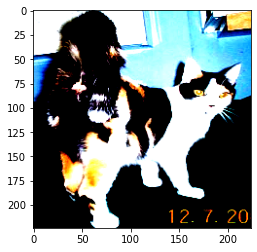

In [17]:
im, label = data[200]
plt.imshow(im.permute(1,2,0).cpu())
print(label)

In [26]:
def get_model():
    model = models.vgg16(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 1),
        nn.Sigmoid()
    )
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

In [28]:
model, criterion, optimizer = get_model()

In [29]:
summary(model, torch.zeros(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

In [12]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    opt.zero_grad()
    pred = model(x)
    batch_loss = loss_fn(pred, y)
    batch_loss.backward()
    opt.step()
    return batch_loss.item()

In [13]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    pred = model(x)
    is_correct = (pred > 0.5) == y
    return is_correct.cpu().numpy().tolist()

In [14]:
def get_data():
    train = CatsDogs(train_data_dir)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True, drop_last=True)
    
    val = CatsDogs(test_data_dir)
    val_dl = DataLoader(val, batch_size=32, shuffle=False, drop_last=True)
    return trn_dl, val_dl

In [15]:
trn_dl, val_dl = get_data()

In [41]:
train_losses, train_accuracies = [], []
val_accuracies = []
for epoch in range(5):
    print(f" epoch {epoch +1}/5")
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies = []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, criterion)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    print(f"Train epoch loss {train_epoch_loss}")
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    print(f"Train epoch accuracy {train_epoch_accuracy}")
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        val_epoch_accuracies.extend(val_is_correct)
    val_epoch_accuracy = np.mean(val_epoch_accuracies)
    
    print(f"Train epoch val accuracy {val_epoch_accuracy}")
    
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_accuracies.append(val_epoch_accuracy)

 epoch 1/5
Train epoch loss 0.048566465957030173
Train epoch accuracy 0.9788306451612904
Train epoch val accuracy 0.9627016129032258
 epoch 2/5
Train epoch loss 0.039217616115967115
Train epoch accuracy 0.9919354838709677
Train epoch val accuracy 0.9838709677419355
 epoch 3/5
Train epoch loss 0.030862533772784854
Train epoch accuracy 0.9879032258064516
Train epoch val accuracy 0.9788306451612904
 epoch 4/5
Train epoch loss 0.02365670636326315
Train epoch accuracy 0.9949596774193549
Train epoch val accuracy 0.9828629032258065
 epoch 5/5
Train epoch loss 0.02279468380936211
Train epoch accuracy 0.9949596774193549
Train epoch val accuracy 0.9818548387096774


<ipython-input-42-a8ad4c838633>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \


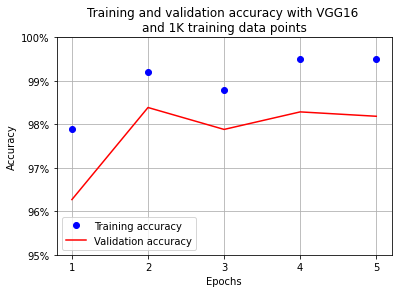

In [42]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.plot(epochs, train_accuracies, 'bo', 
         label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', 
         label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
with VGG16 \nand 1K training data points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.95,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [16]:
import torch.nn as nn

In [17]:
class ResLayer(nn.Module):
    def __init__(self, ni, no, kernel_size, stride=1):
        super(ResLayer, self).__init__()
        padding = kernel_size - 2
        self.conv = nn.Sequential(
            nn.Conv2d(ni, no, kernel_size, stride, padding=padding),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.conv(x) + x
        return x

In [18]:
model = models.resnet18(pretrained=True).to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/pedro/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
52.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
def get_model():
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.fc = nn.Sequential(nn.Flatten(),
                            nn.Linear(512, 128),
                             nn.ReLU(),
                             nn.Dropout(0.2),
                             nn.Linear(128, 1),
                             nn.Sigmoid())
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    return model.to(device), loss_fn, optimizer

In [21]:
model, criterion, optimizer = get_model()

In [22]:
train_losses, train_accuracies = [], []
val_accuracies = []
for epoch in range(5):
    print(f" epoch {epoch +1}/5")
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies = []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, criterion)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    print(f"Train epoch loss {train_epoch_loss}")
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    print(f"Train epoch accuracy {train_epoch_accuracy}")
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        val_epoch_accuracies.extend(val_is_correct)
    val_epoch_accuracy = np.mean(val_epoch_accuracies)
    
    print(f"Train epoch val accuracy {val_epoch_accuracy}")
    
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_accuracies.append(val_epoch_accuracy)

 epoch 1/5
Train epoch loss 0.2523584024560067
Train epoch accuracy 0.9737903225806451
Train epoch val accuracy 0.9616935483870968
 epoch 2/5
Train epoch loss 0.11467534153451843
Train epoch accuracy 0.9778225806451613
Train epoch val accuracy 0.9737903225806451
 epoch 3/5
Train epoch loss 0.11372604551574876
Train epoch accuracy 0.9788306451612904
Train epoch val accuracy 0.9768145161290323
 epoch 4/5
Train epoch loss 0.08528827923920847
Train epoch accuracy 0.9858870967741935
Train epoch val accuracy 0.9707661290322581
 epoch 5/5
Train epoch loss 0.077546575677491
Train epoch accuracy 0.967741935483871
Train epoch val accuracy 0.9495967741935484


<ipython-input-23-a8ad4c838633>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \


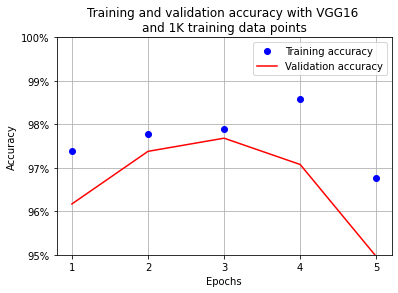

In [23]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.plot(epochs, train_accuracies, 'bo', 
         label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', 
         label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
with VGG16 \nand 1K training data points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.95,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                           for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()